In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

digits = datasets.load_digits(return_X_y=True)
digits_dataset_X = digits[0]
digits_dataset_y = digits[1]


In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
X_col_type = np.zeros(digits_dataset_X[0].shape)
X_col_type

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
from StratKFold import StratKFold
sk = StratKFold(n_splits=10)
sk.add_data(digits_dataset_X,digits_dataset_y)
folds = sk.get_folds()

[([1768, 1153, 526, 416, 1025, 1297, 725, 396, 252, 694, 441, 516, 1677, 1157, 1049, 1323, 1494, 1258, 657, 141, 107, 471, 1668, 479, 1457, 47, 177, 1436, 1556, 355, 753, 1247, 341, 303, 56, 667, 1774, 778, 310, 826, 703, 54, 1234, 1689, 437, 567, 152, 696, 759, 1469, 1051, 959, 762, 1111, 1499, 279, 1217, 98, 1086, 1240, 1346, 431, 1513, 1548, 1378, 729, 659, 63, 1729, 226, 599, 45, 1074, 89, 1479, 1638, 380, 1691, 1651, 1788, 1374, 909, 1281, 4, 194, 24, 280, 121, 1001, 767, 1291, 733, 1044, 163, 460, 330, 531, 801, 681, 1003, 135, 1358, 896, 506, 1361, 521, 766, 1575, 1650, 878, 692, 1215, 1321, 1609, 82, 1224, 1303, 67, 1093, 1063, 1725, 1449, 1085, 58, 451, 1122, 622, 1521, 1173, 1694, 240, 602, 954, 1711, 157, 1649, 1775, 819, 1719, 1684, 663, 533, 7, 1108, 447, 1595, 837, 1325, 1789, 1790, 794, 40, 1794, 284, 127, 1675, 643, 978, 1401, 760, 784, 8, 122, 1763, 1185, 1759, 993, 895, 287, 1048, 1488, 511, 425, 1068, 1230, 975, 555, 348, 1262, 1276, 1676, 1188, 381, 1307, 1065, 724,

### Random Forest

In [5]:
from RandomForestClassifier import RandomForestClassifier 
# rfc = RandomForestClassifier(5)

In [6]:
# rfc.fit(digits_dataset_X, digits_dataset_y, X_col_type)
# y_pred = rfc.predict(digits_dataset_X)

In [7]:
# from multiple_utils import compute_confusion_matrix, calculate_accuracy, calculate_precision, calculate_recall, calculate_f1score
# confusion_mat, n = compute_confusion_matrix(digits_dataset_y, y_pred,[0,1,2,3,4,5,6,7,8,9])
# print(calculate_accuracy(confusion_mat, len(y_pred)))

In [8]:
from multiple_utils import compute_confusion_matrix, calculate_accuracy, calculate_precision, calculate_recall, calculate_f1score
accuracies = []
f1_scores = []
n_tree_values = [1,5,10,20,30,40,50]
for ntrees in n_tree_values:
    rfc = RandomForestClassifier(criterion="gini_impurity",ntree=ntrees)
    mean_accuracy = 0
    mean_f1_score = 0

    for fold in folds:
        train_indices = fold[0]
        test_indices = fold[1]
        X_train = digits_dataset_X[train_indices]
        y_train = digits_dataset_y[train_indices]
        X_test = digits_dataset_X[test_indices]
        y_test = digits_dataset_y[test_indices]
        rfc.fit(X_train, y_train, X_col_type)
        y_pred = rfc.predict(X_test)
        confusion_mat, n = compute_confusion_matrix(y_test, y_pred,[0,1,2,3,4,5,6,7,8,9])
        mean_accuracy += calculate_accuracy(confusion_mat, n) 
        mean_f1_score += calculate_f1score(calculate_precision(confusion_mat), calculate_recall(confusion_mat))

    
    mean_accuracy /= len(folds)
    mean_f1_score /= len(folds)
    print("accuracy: ", mean_accuracy)
    print("f1 score: ", mean_f1_score)
    accuracies.append(mean_accuracy)
    f1_scores.append(mean_f1_score)


accuracy:  0.37211972180614494
f1 score:  0.3698876683856903
accuracy:  0.527463057184217
f1 score:  0.5292356516264148
accuracy:  0.6807705638835133
f1 score:  0.680297443616148
accuracy:  0.7729339541291932
f1 score:  0.7737113628344339
accuracy:  0.8148117849088564
f1 score:  0.8170706691585499
accuracy:  0.8353762183954817
f1 score:  0.8384734657971494
accuracy:  0.8603196921228463
f1 score:  0.8640152807505771


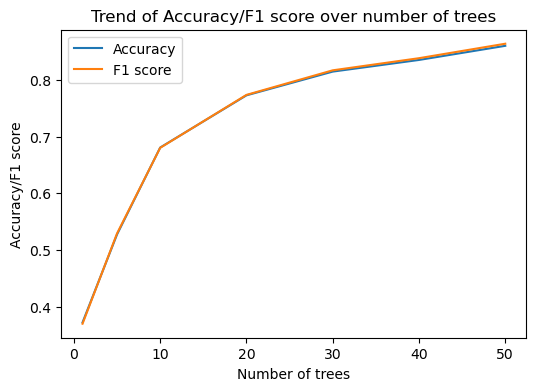

In [9]:
plt.figure(figsize=(6, 4))
plt.plot(n_tree_values, accuracies, label="Accuracy")
plt.plot(n_tree_values, f1_scores, label="F1 score")
plt.xlabel('Number of trees')
plt.ylabel('Accuracy/F1 score')
plt.title('Trend of Accuracy/F1 score over number of trees')
plt.legend()
plt.show()

In [10]:
max_index = accuracies.index(max(accuracies))
print("Optimal accuracy reached at number of trees: ", n_tree_values[max_index])
max_index = f1_scores.index(max(f1_scores))
print("Optimal F1 score reached at number of trees: ", n_tree_values[max_index])

Optimal accuracy reached at number of trees:  50
Optimal F1 score reached at number of trees:  50


In [11]:
from multiple_utils import compute_confusion_matrix, calculate_accuracy, calculate_precision, calculate_recall, calculate_f1score
accuracies = []
f1_scores = []
max_depths = [10,20,30,40,50]
for max_depth in max_depths:
    rfc = RandomForestClassifier(criterion="gini_impurity",ntree=50, maximal_depth=max_depth)
    mean_accuracy = 0
    mean_f1_score = 0

    for fold in folds:
        train_indices = fold[0]
        test_indices = fold[1]
        X_train = digits_dataset_X[train_indices]
        y_train = digits_dataset_y[train_indices]
        X_test = digits_dataset_X[test_indices]
        y_test = digits_dataset_y[test_indices]
        rfc.fit(X_train, y_train, X_col_type)
        y_pred = rfc.predict(X_test)
        confusion_mat, n = compute_confusion_matrix(y_test, y_pred,[0,1,2,3,4,5,6,7,8,9])
        mean_accuracy += calculate_accuracy(confusion_mat, n) 
        mean_f1_score += calculate_f1score(calculate_precision(confusion_mat), calculate_recall(confusion_mat))

    
    mean_accuracy /= len(folds)
    mean_f1_score /= len(folds)
    print("accuracy: ", mean_accuracy)
    print("f1 score: ", mean_f1_score)
    accuracies.append(mean_accuracy)
    f1_scores.append(mean_f1_score)


accuracy:  0.847039383460457
f1 score:  0.8494281191658676
accuracy:  0.8448084652201239
f1 score:  0.8466221690782525
accuracy:  0.844826466118511
f1 score:  0.848804752642093
accuracy:  0.8525501535984071
f1 score:  0.8540548487203876
accuracy:  0.8493899028773504
f1 score:  0.8526379982912401


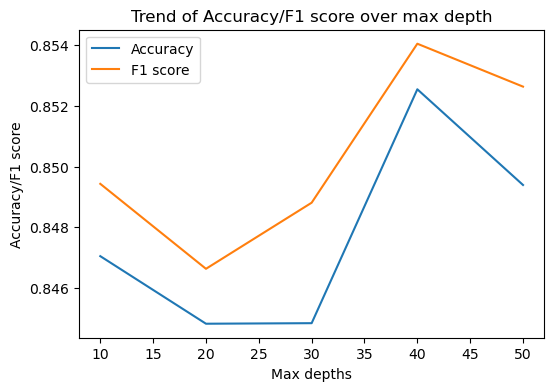

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(max_depths, accuracies, label="Accuracy")
plt.plot(max_depths, f1_scores, label="F1 score")
plt.xlabel('Max depths')
plt.ylabel('Accuracy/F1 score')
plt.title('Trend of Accuracy/F1 score over max depth')
plt.legend()
plt.show()

### KNN

In [13]:
from KNNClassifier import KNN_Classifier

In [14]:
from multiple_utils import compute_confusion_matrix, calculate_accuracy, calculate_precision, calculate_recall, calculate_f1score
from utils import Normalizer
scaler = Normalizer()

accuracies = []
precisions = []
recalls = []
f1_scores = []
n_neighbors = [1,5,10,20,30,40,50]
for n_neighbor in n_neighbors:
    knn = KNN_Classifier(n_neighbors=n_neighbor) 
    mean_accuracy = 0
    mean_f1_score = 0

    for fold in folds:
        train_indices = fold[0]
        test_indices = fold[1]
        X_train = digits_dataset_X[train_indices]
        y_train = digits_dataset_y[train_indices]
        #X_train = scaler.fit_transform(X_train)
        X_test = digits_dataset_X[test_indices]
        y_test = digits_dataset_y[test_indices]
        #X_test = scaler.transform(X_test)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        confusion_mat, n = compute_confusion_matrix(y_test, y_pred,[0,1,2,3,4,5,6,7,8,9])
        mean_accuracy += calculate_accuracy(confusion_mat, n) 
        mean_f1_score += calculate_f1score(calculate_precision(confusion_mat), calculate_recall(confusion_mat))

    mean_accuracy /= len(folds)
    mean_f1_score /= len(folds)
    print("accuracy: ", mean_accuracy)
    print("f1 score: ", mean_f1_score)
    accuracies.append(mean_accuracy)
    f1_scores.append(mean_f1_score)


accuracy:  0.9883398069339503
f1 score:  0.9886656455175338
accuracy:  0.986670487805309
f1 score:  0.9869087946803792
accuracy:  0.9849992516147845
f1 score:  0.9853191350259349
accuracy:  0.9772322592592617
f1 score:  0.9778118507128998
accuracy:  0.9716907570453553
f1 score:  0.9723499522272083
accuracy:  0.9633373051156214
f1 score:  0.963974621417299
accuracy:  0.9555308728816518
f1 score:  0.9565024530748694


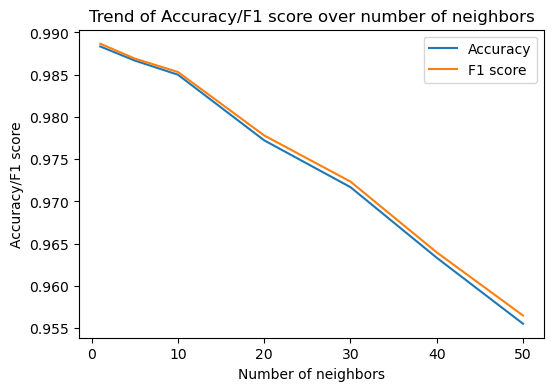

In [15]:
plt.figure(figsize=(6, 4))
plt.plot(n_neighbors, accuracies, label="Accuracy")
plt.plot(n_neighbors, f1_scores, label="F1 score")
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy/F1 score')
plt.title('Trend of Accuracy/F1 score over number of neighbors')
plt.legend()
plt.show()

In [16]:
max_index = accuracies.index(max(accuracies))
print("Optimal accuracy reached at number of neighbors: ", n_neighbors[max_index])
max_index = f1_scores.index(max(f1_scores))
print("Optimal F1 score reached at number of neighbors: ", n_neighbors[max_index])

Optimal accuracy reached at number of neighbors:  1
Optimal F1 score reached at number of neighbors:  1
